# Initial needs assessment for oxygen equipment in India

## Background
Pneumonia is the leading cause of death among children worldwide, killing nearly 1 million children every year. Hypoxemia, or low levels of oxygen in the blood, increases the risk of mortality and is a common complication of childhood pneumonia. Fortunately, hypoxemia is easily treated by oxygen therapy. Unfortunately, many health facilities in low-resource settings have unreliable or no oxygen supplies, delaying treatment when needed. In particular, India bears the greatest burden of pneumonia in the world and their health facilities also suffer from lack of reliable oxygen supplies.

To provide oxygen therapy safely requires both a source of oxygen and a method of monitoring dosage. Oxygen cylinders and oxygen concentrators are two sources of oxygen. Pulse oximeters are the standard of care for monitoring oxygen therapy. Poor electricity, roads for delivery, and trained personnel are among the main causes of low availability of reliable medical equipment in these areas.

## Purpose

To analyze India's medical equipment inventory of its public health system and: 
* determine where oxygen supplies are available
* determine the extent of 'coordinated use' of oxygen and pulse oximetry

##  Methods

### Data source
*Inventory.db* was created from data on the Indian government hospital inventory. 
* For one state, there was a csv with records of each medical equipment inventoried throughout all public health facilities
* Each record contained information about the facility's name, type, district, as well as the medical equipment's quantity, location within the facility (e.g. which ward), its functional status, and warranty applicability.
* For this report, only the records from one state and related to oxygen equipment (cylinders, concentrators, humidifiers, and pulse oximeters) were analyzed.

### Inventory.db
*Inventory.db* contains three tables:
* *'Inventory'*: Collection of records from original csv that contain only "oxygen" or "pulse oximeter"; Each record is distinct for each piece of medical equipment in the state; Sanitized
* *'Facility_info'*: Analysis of records from *'Inventory'*, each record contains  information on the total number of oxygen cylinders, concentrators, and pulse oximeters in each facility, as well as whether the facility has 'coordinated use' (e.g. has both an oxygen source and pulse oximetry)
* *'State_info'*: Analysis of records from *'Facility_info'*, each record contains information on the total number of districts, facilities (and types), and overall % of facilities that have both oxygen and pulse oximetry

In [1]:
import csv, sqlite3, Inventory
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
conn = sqlite3.connect('NHSRC.db')
cur = conn.cursor()

Cleared table:  Inventory

Created table: Inventory

Populated table: Inventory

Inventory cleaned: 
'oxygen cyclinder' <-- oxygen cylinder
'store' <-- store room
'surgical (ot)' <-- surgical
'surgery' <-- surgical
'surgical ward' <-- surgical
'emergency ward' <-- emergency
'others' <-- other
'sncu store room' <-- sncu
'o t' <-- ot
'ot-general' <-- ot
'o.t.store' <-- ot store
'opd  ' <-- opd
'opd room' <-- opd
'dentel' <-- dental
'emergency ward' <-- emergency
'eye' <-- eye ot
'sterlization' <-- sterilization
'eye store' <-- eye ot
'meternity' <-- maternity
'meternity room' <-- maternity
'maternal & child care' <-- mch
'w&c helth' <-- mch
'maternal and child care' <-- mch
'm & child care' <-- mch
'maternal and child' <-- mch
'maternal and child health' <-- mch
'female ward room' <-- female ward
'icu room' <-- icu
'i c u' <-- icu
'lab' <-- laboratory
'labour ward' <-- labour room
'child ward' <-- child health
'vip room' <-- vip

Preview of Inventory (top 3 rows): 
(u'agra', u'dh', u'dis

### Data sanitization
A master list of wards and equipment name was generated in order to rectify the problems with misspellings and inconsistent terminology in the original csv.
* Common misspellings: "Oxygen cyclinders", "meternity"
* Examples of inconsistent terminology: "emerg" and "emergency room", "mch", "maternal and child", "m&c"

* *Inventory.py* contains the code used to create NHSRC. 
* *List 1A and 1B* describes the master list used during the sanitization of the data.

*List 1A*

In [44]:
print 'Master list of equipment terms:'
cur.execute('SELECT DISTINCT equipment FROM Inventory')
equip_list = cur.fetchall()
for i in equip_list: print i[0]

Master list of equipment terms:
oxygen concentrator
oxygen cylinder
oxygen humidifier
pulse oximeter


*List 1B*

In [45]:
print 'Master list of location (rooms and wards) terms:'
equip = 'Oxygen-related equipment'
cur.execute('SELECT DISTINCT location FROM Inventory')
loc_list = cur.fetchall()
for i in loc_list: print i[0]    

Master list of location (rooms and wards) terms:
baby rest room
blood bank
cardiology
child emergency
child health
cmsd store
dental
drug room
duty room
emergency
ent
eye 
eye ot
female ot
female ward
female ward room 
general ot
general ward
gyno ot
icu
injection room
innner opd maleward
laboratory
labour room
logoy patho
m o t
main ot
main store
major ot
male ward
maternity
mch
mini store
minor ot female
mtp room
nbs room
ncd dept.
nicu
nrc
o p d
o t store
o x y
opd
opd 
opd room 
ortho
orthopatic
ot
ot emergency
ot store
other
p.p.c. ot
pathology
pathology store
physiotherapy
physiotherapy and rehabilitation
physiotherapy room
pp ot
radiology
sncu
sterilization
store room
surgical
trauma center store
vip
ward
ward medical
x-ray


### Data visualization
Bar charts and pie charts were used 

In [46]:
def plot_pie(x, labels): 
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
    pie_wedge_collection = plt.pie(x = x, labels = labels, colors = colors, autopct ='%.1f')
#     plt.legend(loc = 3)
    plt.show()
    
    for pie_wedge in pie_wedge_collection[0]:
        pie_wedge.set_edgecolor('white')
    
def plot_bar(total, labels, title):
    n_groups = len(total)
    index = np.arange(n_groups)
    bar_width = 0.35

    plt.bar(index, total, bar_width)
    plt.xlabel('Facilities')
    plt.ylabel('Number')
    plt.title(title)
    plt.xticks(index+bar_width/2, labels)

### Results and analysis

#### Types of oxygen-related equipment used 

Based on *Figure 2*, most of the oxygen is being supplied by cylinders. 
* There is nearly 6 times more cylinders than concentrators.
* Assuming that it is ideal to have one pulse oximeter per oxygen source, there is insufficient pulse oximeters to safely monitor the use of all the oxygen cylinders and concentrators in Uttar Pradesh.

From the lack of pulse oximeters, it is likely that healthcare providers are administering oxygen based on clinical signs (e.g.cyanosis) rather than oxygen saturation levels. This can be problematic as pulse oximetry has become part of standard of care to prevent oxygen toxicity in patients. Sudies have shown that pulse oximetry can be a safer and more effective oxygen therapy monitor than clinical signs alone. 

*Figure 1. Types of oxygen-equipment used.*

Breakdown of oxygen-related equipment: 
oxygen cylinders: 1397
pulse oximeters: 492
oxygen concentrators: 241
oxygen humidifiers: 28
Total: 2158



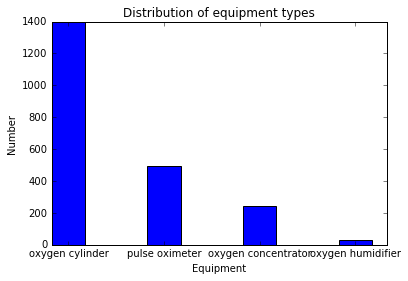

In [47]:
# Figure 1.
cur.execute('SELECT equipment, COUNT (*) from Inventory GROUP BY equipment')
b = cur.fetchall()
sorted_b = sorted(b, key = lambda x: x[1], reverse = True)
total = sum([item[1] for item in b])
print 'Breakdown of oxygen-related equipment: '
for item in sorted_b: print ("{}s: {}".format(*item))  
print "Total: {}".format(total)
print


facility_types = [i[0] for i in sorted_b]
count = [i[1] for i in sorted_b]
title = 'Distribution of equipment types'
plot_bar(count, facility_types, title)
plt.xlabel('Equipment')
plt.show()

#### Distribution of facilities in one state

District hospitals (DH), Community Health Centres (CHC), and Primary Health Centres (PHC) are three general types of hospitals that illustrate the typical tiered-structure of the health system. Typically:
* District Hospitals (DH): Centrally located in city centers, has specialized doctors and equipment, relatively reliable electricity
* Community Health Centres (CHC): Located in more rural areas, may have specialized doctors, some electricity
* Primary Health Centres (PHC): Located in more rural areas, no specialized doctors, poor electricity, not necessarily 24x7 hours

Based on Figure 1, there are 587 health facilities in the state that currently have oxygen-related equipment. Of these most are CHCs, followed by PHCs, and DHs. 

*Figure 2. Distribution of facility types*

Total facilities in state:  587



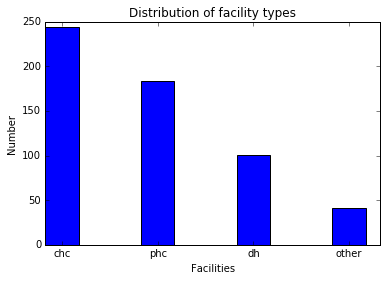

In [48]:
# Figure 2.
a = Inventory.state_facility_breakdown(conn) #type(a) = dict, dict.keys() = 'dh', 'phc', 'chc', 'other'
del a['total']
sorted_a = sorted(a.items(), key = lambda x: x[1], reverse = True)
facility_types = [i[0] for i in sorted_a]
count = [i[1] for i in sorted_a]
title = 'Distribution of facility types'
plot_bar(count, facility_types, title)
plt.show()

#### Use of both oxygen and pulse oximetry
In addition to a reliable oxygen source, an effective tool to regularly monitor the patient's oxygen saturation levels is essential to safe treatment. Over-use of oxygen can lead to oxygen toxicity, causing blindness in neonates and other complications in other age groups. 

Based on *Figure 3*, the majority of facilities do not have both oxygen and pulse oximeters.
* Only 10.9% of all facilities with any oxygen-related equipment have both oxygen sources and pulse oximeters.
* Nearly half of DH have both pieces of equipment
* Less than 9% of CHCs and 1% of PHCs have the right equipment  
* This doesn't account for non-functioning equipment

*Figure 3. Facilities using both oxygen and pulse oximetry*

Total facilities in state:  587

% Facilities with coordinated use:  10.9 %



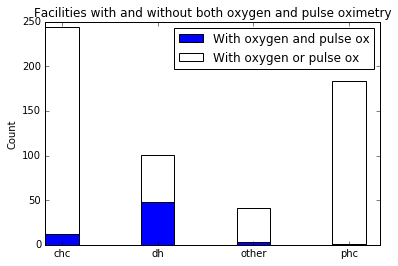

In [49]:
# Figure 3
c = Inventory.coordinated_use_breakdown(conn)
del c['% Facilities with coordinated use'], c['total']
n = len(c)
sorted_a = sorted(a.items(), key = lambda x: x[0]) # type(sorted_a) =[('dh', count), (etc)]
sorted_c = sorted(c.items(), key = lambda x: x[0]) # type(sorted_a) =[('dh', count), (etc)]
total_a = [i[1] for i in sorted_a]
total_c = [i[1] for i in sorted_c]
ind = np.arange(n)
w = 0.35
labels = [i[0] for i in sorted_a]

p1 = plt.bar(ind, total_c, w, color='b')
p2 = plt.bar(ind, np.array(total_a)-np.array(total_c), w, color = 'w', bottom = total_c)
plt.ylabel('Count')
plt.title('Facilities with and without both oxygen and pulse oximetry')
plt.xticks(ind+w/2., labels)
plt.legend((p1[0], p2[0]), ('With oxygen and pulse ox', 'With oxygen or pulse ox'))
plt.show()

Based on Figure 4, District Hospitals are relatively better equipped with both oxygen and pulse oximetry than any other facility type.

This could be due to several reasons, including: ease of access to suppliers in city centers where most DHs are located, greater need for such equipment in DHs cause by referrals from lower-level facilities such as PHCs and CHCs.

*Figure 4. Types of facilities with both oxygen and pulse oximetry*

Total facilities in state:  587

% Facilities with coordinated use:  10.9 %



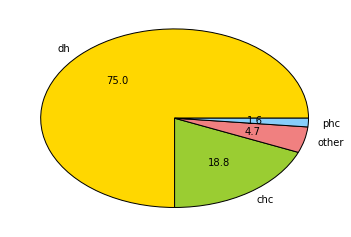

In [50]:
# Figure 4
c = Inventory.coordinated_use_breakdown(conn) # type(c) = dict, c.keys() = 'phc', 'dh', etc.
del c['% Facilities with coordinated use'], c['total']
sorted_c = sorted(c.items(), key = lambda x: x[1], reverse = True)
facility_types = [i[0] for i in sorted_c]
total = [i[1] for i in sorted_c]
title = 'Facilities with both oxygen and pulse oximetry (coordinated use)'
plot_pie(x = total, labels = facility_types)

#### Location of oxygen equipment 
Understanding where oxygen is currently used allows us to understand the current demand, further informing the market for oxygen devices in India.

##### Both oxygen and pulse oximeters
Based on *Figure 5*, the need for oxygen devices is fragmented
* Of facilities with both oxygen and pulse oximeters, the majority of devices are used in surgical wards, laboratories, store rooms, OT, and emergency
* 'Other' rooms are unknown

*Figure 5. Oxygen and pulse oximeters*

Breakdown of coordinated use by room: 
emergency: 6
female ot: 1
icu: 1
laboratory: 8
labour room: 1
m o t: 1
main store: 1
mch: 3
minor ot female: 1
ot: 7
other: 12
sncu: 2
store room: 8
surgical: 12
Total rooms: 64

Total rooms in state:  838

% Rooms with coordinated use:  7.6 %



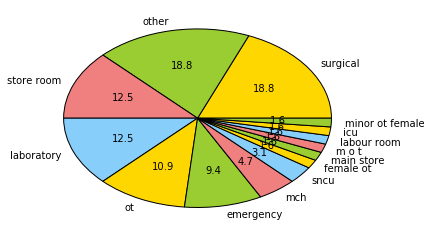

In [51]:
# Figure 5
d = Inventory.coordinated_use_room_breakdown(conn)
del d['% Rooms with coordinated use']
sorted_d = sorted(d.items(), key = lambda x: x[1], reverse = True)
rooms = [i[0] for i in sorted_d]
total = [i[1] for i in sorted_d]
title = 'Rooms with both oxygen and pulse oximetry (coordinated use)'

plot_pie(total,rooms)

##### Oxygen concentrators
*Figure 6. Oxygen concentrators*

Oxygen concentrator availability by room:
cardiology (1), ent (1), female ot (1), female ward room  (1), innner opd maleward (1), male ward (1), o p d (1), pathology store (1), blood bank (2), general ward (2), icu (2), main store (2), sterilization (2), maternity (4), logoy patho (5), mch (5), trauma center store (5), other (6), female ward (7), labour room (8), child health (9), sncu (9), ot (16), laboratory (30), emergency (37), surgical (38), store room (44)


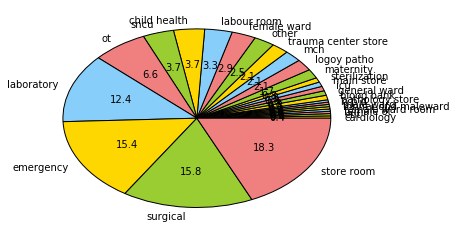

In [55]:
# Figure 6. Oxygen concentrators
print 'Oxygen concentrator availability by room:'
cur.execute('SELECT DISTINCT district, facility, facility_name, location, '
            'COUNT (*) FROM Inventory '
            'WHERE equipment = "oxygen concentrator" GROUP BY location')
o2_conc_loc = cur.fetchall()
o2_conc_loc = sorted(o2_conc_loc, key = lambda loc: loc[4])
print ', '.join(['{} ({})'.format(i[3], i[4]) for i in o2_conc_loc])
rooms = [i[3] for i in o2_conc_loc]
total = [i[4] for i in o2_conc_loc]
plot_pie(total,rooms)

##### Oxygen cylinders
*Figure 7. Oxygen cylinders*

Oxygen cylinder availability by room:
baby rest room (1), child emergency (1), ent (1), minor ot female (1), mtp room (1), ortho (1), orthopatic (1), p.p.c. ot (1), physiotherapy and rehabilitation (1), duty room (2), eye  (2), male ward (2), o x y (2), ward (2), dental (3), icu (3), injection room (3), eye ot (4), pathology (4), sncu (4), o p d (6), blood bank (8), general ward (9), maternity (10), logoy patho (11), m o t (11), cardiology (17), opd (21), sterilization (23), laboratory (27), labour room (42), mch (47), opd  (61), ot (85), emergency (93), store room (127), other (286), surgical (473)


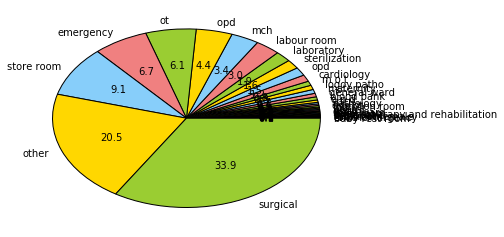

In [56]:
# Figure 7. Oxygen cylinders
print 'Oxygen cylinder availability by room:'
cur.execute('SELECT DISTINCT district, facility, facility_name, location, '
            'COUNT (*) FROM Inventory '
            'WHERE equipment = "oxygen cylinder" GROUP BY location')
o2_cyl_loc = cur.fetchall()
o2_cyl_loc = sorted(o2_cyl_loc, key = lambda loc: loc[4])

print ', '.join(['{} ({})'.format(i[3], i[4]) for i in o2_cyl_loc])

rooms = [i[3] for i in o2_cyl_loc]
total = [i[4] for i in o2_cyl_loc]
plot_pie(total,rooms)

##### Pulse oximeters
*Figure 8. Pulse oximeters*

Pulse oximeter availability by room:
blood bank (1), general ot (1), gyno ot (1), m o t (1), mini store (1), nbs room (1), ncd dept. (1), nrc (1), o t store (1), opd room  (1), ot emergency (1), physiotherapy room (1), pp ot (1), sterilization (1), ward (1), ward medical (1), x-ray (1), dental (2), eye ot (2), female ot (2), minor ot female (2), o p d (2), pathology (2), physiotherapy (2), radiology (2), major ot (3), opd (3), vip (3), maternity (4), main ot (5), main store (5), ot store (5), drug room (6), nicu (6), cardiology (9), icu (9), labour room (10), mch (13), sncu (19), other (20), cmsd store (28), emergency (45), store room (46), laboratory (52), ot (77), surgical (91)


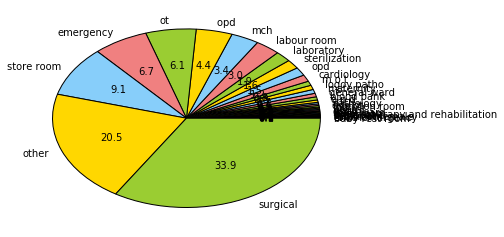

In [57]:
# Figure 8. Pulse oximeters
print 'Pulse oximeter availability by room:'
cur.execute('SELECT DISTINCT district, facility, facility_name, location, '
            'COUNT (*) FROM Inventory '
            'WHERE equipment = "pulse oximeter" GROUP BY location')
pox_loc = cur.fetchall()
pox_loc = sorted(pox_loc, key = lambda loc: loc[4])

print ', '.join(['{} ({})'.format(i[3], i[4]) for i in pox_loc])

plot_pie(total,rooms)

### Future work
* Further sanitize the master list using *fuzzywuzzy* string matching
* Analyze equipment gaps due to non-functioning equipment, which have been recorded in the original data sets 
* Complete the analyses on all states in India
* Use the nation-wide inventory analysis to inform the market need for oxygen concentrators

In [58]:
conn.close()